# PROJETO DE INTRODUÇÃO À CIÊNCIA DE DADOS

Ana V. R. Araújo\
Hélio V. R. Neto

## Pacotes utilizados

In [ ]:
pip install pandas gdown

In [4]:
!pip install numpy==1.26.4

In [2]:
%pip install pycaret --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# <> Verificando se o pacote foi instalado
%pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [1]:
# Bibliotecas utilizadas neste projeto

from pycaret.classification import *
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import kurtosis, skew
from scipy.stats import chi2_contingency
import gdown

## Funções


In [2]:
def import_from_gdrive(url):
  # Extract file ID from the Google Drive URL
    if 'drive.google.com/file/d/' in url:
        file_id = url.split('drive.google.com/file/d/')[1].split('/')[0]
    elif 'drive.google.com/open?id=' in url:
        file_id = url.split('drive.google.com/open?id=')[1].split('&')[0]
    elif 'spreadsheets/d/' in url:
        file_id = url.split('spreadsheets/d/')[1].split('/')[0]
    else:
        raise ValueError("URL format not recognized. Please provide a valid Google Drive link.")

    # Create a direct download link
    direct_download_url = f'https://drive.google.com/uc?id={file_id}'

    # Download the file
    output_path = 'downloaded_data.csv'
    gdown.download(direct_download_url, output_path, quiet=False)

    dados = pd.read_csv(output_path)
    return dados

## Importando os dados

In [25]:
# Link do conjunto de dados
gdrive_url = "https://drive.google.com/file/d/1LFrGGpXqzPHyE1FiGl3EirrishVLIFDu/view?usp=drive_link"

# Importando os dados
dados = import_from_gdrive(gdrive_url)

Downloading...
From: https://drive.google.com/uc?id=1LFrGGpXqzPHyE1FiGl3EirrishVLIFDu
To: /content/downloaded_data.csv
100%|██████████| 913k/913k [00:00<00:00, 8.95MB/s]


## Entendimento dos dados

Entendendo os dados de modo geral

In [ ]:
# Conferindo as primeiras linhas

dados.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_segmento_aviacao,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,1.0,450,2.0,2005.0,EXPERIMENTAL,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL
1,201805021421302,INCIDENTE,AERÓDROMO,AVIÃO,EMBRAER,ERJ 190-200 IGW,JATO,2.0,52290,125.0,2012.0,REGULAR,TÁXI,VOO REGULAR,NENHUM
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,AVIÃO,EMBRAER,EMB-810C,PISTÃO,2.0,2073,7.0,1980.0,TÁXI AÉREO,POUSO,TÁXI AÉREO,SUBSTANCIAL
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,HELICÓPTERO,BELL HELICOPTER,206L-4,TURBOEIXO,1.0,2018,7.0,1997.0,ADMINISTRAÇÃO INDIRETA,APROXIMAÇÃO FINAL,OPERAÇÃO ESPECIALIZADA,LEVE
4,201103187273112,INCIDENTE,OUTROS,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,PISTÃO,1.0,1800,1.0,2004.0,ESPECIALIZADA,TÁXI,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL
5,200808073991179,ACIDENTE,PERDA DE CONTROLE NO SOLO,AVIÃO,EMBRAER,EMB-820C NAVAJO,PISTÃO,2.0,3175,8.0,1981.0,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL
6,201604251335501,INCIDENTE GRAVE,TRÁFEGO AÉREO,AVIÃO,BOEING COMPANY,B787-9 DREAMLINER,JATO,2.0,253000,NaN,2015.0,***,CRUZEIRO,VOO REGULAR,NENHUM
7,201108118145873,ACIDENTE,POUSO LONGO,AVIÃO,CESSNA AIRCRAFT,U206G,PISTÃO,1.0,1633,6.0,1981.0,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL
8,201604062021424,ACIDENTE,PERDA DE CONTROLE NO SOLO,AVIÃO,CESSNA AIRCRAFT,U206F,PISTÃO,1.0,1633,6.0,1973.0,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL
9,201604251335501,INCIDENTE GRAVE,TRÁFEGO AÉREO,AVIÃO,BOEING COMPANY,777-223ER,JATO,2.0,229520,NaN,2001.0,***,CRUZEIRO,VOO REGULAR,NENHUM


In [ ]:
# Entendendo a dimensão do conjunto de dados

dados.shape

(5116, 15)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   codigo_ocorrencia               5116 non-null   int64  
 1   ocorrencia_classificacao        5116 non-null   object 
 2   ocorrencia_tipo                 5116 non-null   object 
 3   aeronave_equipamento            5116 non-null   object 
 4   aeronave_fabricante             5116 non-null   object 
 5   aeronave_modelo                 5116 non-null   object 
 6   aeronave_tipo_motor             5116 non-null   object 
 7   aeronave_quantidade_motores     5087 non-null   float64
 8   aeronave_peso_maximo_decolagem  5116 non-null   int64  
 9   aeronave_quantidade_assentos    5040 non-null   float64
 10  aeronave_ano_fabricacao         5053 non-null   float64
 11  aeronave_segmento_aviacao       5116 non-null   object 
 12  aeronave_fase_voo               51

Conferindo dados duplicados


In [ ]:
dados.duplicated().sum()

1

In [ ]:
# Conferindo se não há id's repetidos

dados['codigo_ocorrencia'].duplicated().sum()

53

Analise das variáveis numéricas

In [ ]:
dados.describe()

#Estranho esse ano de fabricação 0.

,codigo_ocorrencia,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao
count,5.116000e+03,5087.000000,5116.000000,5040.000000,5053.00000
mean,2.012660e+14,1.493218,16271.238663,29.179563,1928.06887
std,2.816985e+11,0.560096,37630.153351,57.098002,350.12826
min,2.008010e+14,0.000000,0.000000,0.000000,0.00000
25%,2.010101e+14,1.000000,1202.000000,2.000000,1979.00000
50%,2.013012e+14,1.000000,2073.000000,6.000000,1992.00000
75%,2.015041e+14,2.000000,6800.000000,11.000000,2006.00000
max,2.018050e+14,4.000000,380790.000000,659.000000,2017.00000


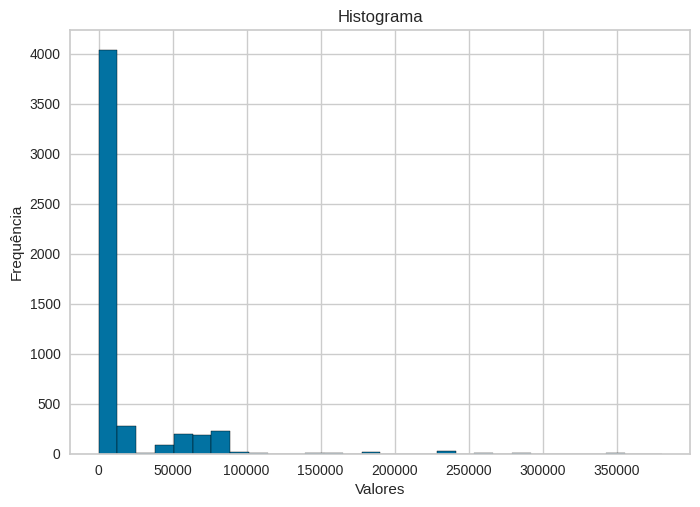

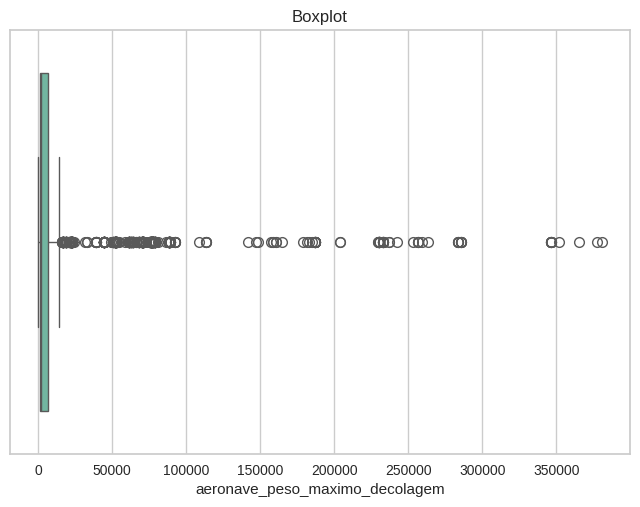

In [ ]:
# Analisando as variáveis: Peso maximo

plt.hist(dados['aeronave_peso_maximo_decolagem'], bins=30, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

sns.boxplot(x=dados['aeronave_peso_maximo_decolagem'], palette="Set2")
plt.title("Boxplot")
plt.show()
print("\n\n")

In [ ]:
dados[dados['aeronave_peso_maximo_decolagem'] == 0].shape

(72, 15)

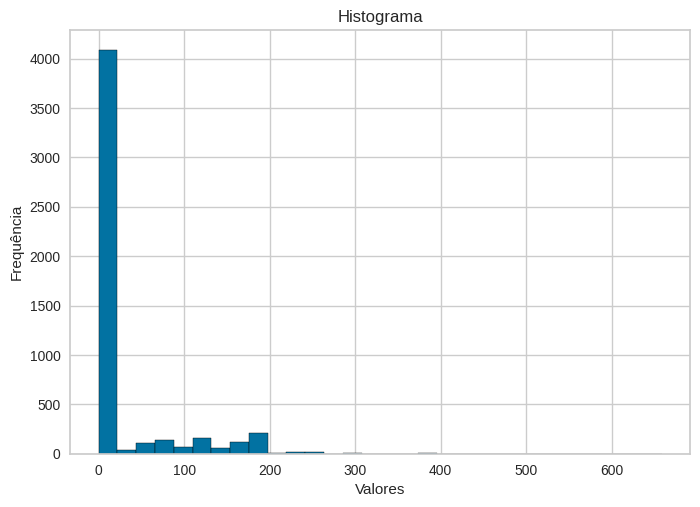

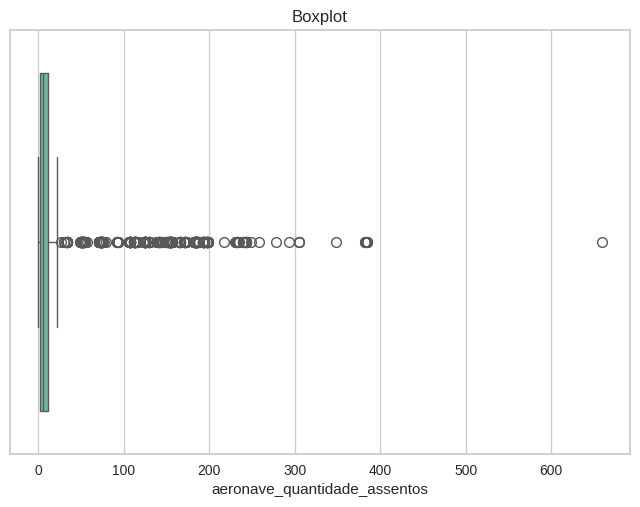

In [ ]:
# Analisando as variáveis: Quantidade de assentos

plt.hist(dados['aeronave_quantidade_assentos'], bins=30, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

sns.boxplot(x=dados['aeronave_quantidade_assentos'], palette="Set2")
plt.title("Boxplot")
plt.show()
print("\n\n")

In [ ]:
dados[dados['aeronave_quantidade_assentos'] == 0].shape # não existe aviões com zero assentos!

(152, 15)

In [ ]:
dados['aeronave_quantidade_motores'].value_counts()

,count
aeronave_quantidade_motores,
1.0,2587
2.0,2362
3.0,79
0.0,47
4.0,12


In [ ]:
dados['aeronave_ano_fabricacao'].value_counts() #pode ser interessante categorizar essa variável em uma idade.

,count
aeronave_ano_fabricacao,
2008.0,210
1992.0,192
2009.0,191
1980.0,189
2007.0,178
...,...
1959.0,2
1942.0,2
1954.0,2


In [ ]:
dados[dados['aeronave_ano_fabricacao'] == 0].shape # Como o avião pode ser fabricado no ano 0? não faz sentido. Precisa apagar.

(161, 15)

Análise das variáveis categóricas


In [ ]:
dados['ocorrencia_classificacao'].value_counts() # Variável alvo

,count
ocorrencia_classificacao,
INCIDENTE,2817
ACIDENTE,1677
INCIDENTE GRAVE,622


In [ ]:
dados['aeronave_equipamento'].value_counts()

,count
aeronave_equipamento,
AVIÃO,4220
HELICÓPTERO,585
ULTRALEVE,261
PLANADOR,17
***,15
ANFÍBIO,12
TRIKE,2
DIRIGÍVEL,2
HIDROAVIÃO,1


In [ ]:
dados['aeronave_fabricante'].value_counts() #ISerá excluída

,count
aeronave_fabricante,
CESSNA AIRCRAFT,753
NEIVA INDUSTRIA AERONAUTICA,603
EMBRAER,561
PIPER AIRCRAFT,341
BOEING COMPANY,304
...,...
CESNA,1
JAMES F GUZMAN,1
ECLIPSE AEROSPACE,1


In [ ]:
dados['aeronave_modelo'].value_counts()

,count
aeronave_modelo,
AB-115,216
EMB-810D,147
EMB-810C,144
ATR-72-212A,121
152,100
...,...
707-351C,1
TL-2000RG STING,1
A340-642,1


In [ ]:
dados['aeronave_tipo_motor'].value_counts()

,count
aeronave_tipo_motor,
PISTÃO,2960
JATO,1011
TURBOÉLICE,613
TURBOEIXO,464
***,51
SEM TRAÇÃO,17


In [ ]:
dados['aeronave_segmento_aviacao'].value_counts()

,count
aeronave_segmento_aviacao,
PARTICULAR,1497
REGULAR,1034
TÁXI AÉREO,773
INSTRUÇÃO,771
EXPERIMENTAL,364
AGRÍCOLA,276
ADMINISTRAÇÃO DIRETA,143
ESPECIALIZADA,113
***,83


In [ ]:
dados['aeronave_fase_voo'].value_counts() #ISerá excluída

,count
aeronave_fase_voo,
POUSO,902
DECOLAGEM,783
CRUZEIRO,645
CORRIDA APÓS POUSO,594
TÁXI,433
SUBIDA,357
APROXIMAÇÃO FINAL,229
DESCIDA,190
ESPECIALIZADA,173


In [ ]:
dados['aeronave_tipo_operacao'].value_counts()

,count
aeronave_tipo_operacao,
VOO PRIVADO,1575
VOO REGULAR,1063
TÁXI AÉREO,763
VOO DE INSTRUÇÃO,751
OPERAÇÃO AGRÍCOLA,381
VOO EXPERIMENTAL,264
OPERAÇÃO POLICIAL,123
OPERAÇÃO ESPECIALIZADA,87
***,63


In [ ]:
dados['aeronave_nivel_dano'].value_counts()

,count
aeronave_nivel_dano,
NENHUM,1872
SUBSTANCIAL,1466
LEVE,1327
DESTRUÍDA,337
***,114


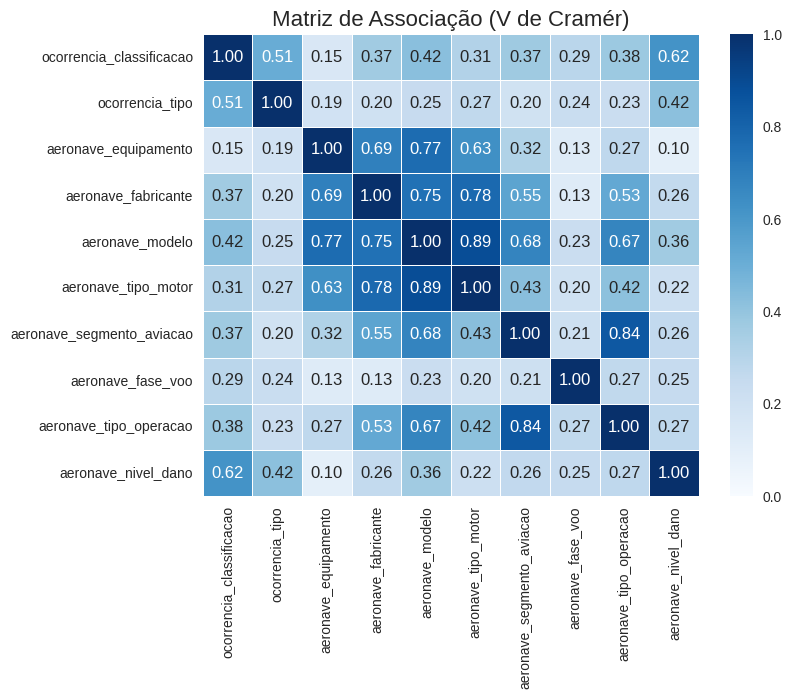

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

colunas_categoricas = dados.select_dtypes(include=['object']).columns

# Criar uma matriz de associação
matriz_associacao = pd.DataFrame(np.zeros((len(colunas_categoricas), len(colunas_categoricas))),
                                 index=colunas_categoricas, columns=colunas_categoricas)

# Preencher a matriz com os valores do V de Cramér
for col1 in colunas_categoricas:
    for col2 in colunas_categoricas:
        matriz_associacao.loc[col1, col2] = cramers_v(dados[col1], dados[col2])

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_associacao, annot=True, cmap='Blues', vmin=0, vmax=1, fmt=".2f", linewidths=.5)

# Adicionar título
plt.title('Matriz de Associação (V de Cramér)', fontsize=16)

# Mostrar o gráfico
plt.show()

**Observações sobre o que foi visto:**

Neste conjunto de dados há **5063 observações** prontas para uso e **15 variáveis**. A variável alvo **ocorrencia_classificacao**, objetivamos classificar cada ocorrência como **acidente, incidente ou incidente grave**.
\
\
Observou-se que neste conjunto de dados haviam **duplicatas** e **valores ausentes**. Apenas as duplicatas foram apagada.
\
\
As variáveis aeronave_peso_maximo_decolagem, aeronave_quantidade_assentos,  , apresentam **outliers**.
\
\
Há valores **incoerentes** em algumas linhas. Por exemplo: Há casos em que o ano de fabricação é 0. Essas observações estranhas vamos apagar.
\
\
Torna-se necessário escolher um modelo que permita **classificar** uma observação em um dos três casos, recebendo como entrada variáveis qualitativas e quantitativas. Algumas opções:

1.   Árvore de decisão;
2.   Floresta aleatória;
3.   K-nn;
4.   Regressão Logística
5.   Naive Bayes


## Preparação dos dados

In [26]:
# Tirando duplicatas

dados = dados.drop_duplicates()

dados.duplicated().sum()

0

In [27]:
#Lidando com mais um tipo de duplicata, neste caso, há códigos de ocorrências repetidos

dados['nulos'] = dados.isnull().sum(axis=1)
dados = dados.sort_values(by=['codigo_ocorrencia', 'nulos'])
dados = dados.drop_duplicates(subset=['codigo_ocorrencia'], keep='first')
dados = dados.drop(columns=['nulos'])

dados['codigo_ocorrencia'].duplicated().sum()

0

In [28]:
# Como esta variável servia apenas para conferir possíveis duplicatas, vamos apagar

dados = dados.drop(columns=['codigo_ocorrencia'])

In [29]:
# Vamos optar por apagar as seguintes variáveis:
 #muitas categorias que podem atrapalhar desnecessariamente
dados = dados.drop(columns=['aeronave_fase_voo'])
dados = dados.drop(columns=['aeronave_equipamento']) #muitas categorias que podem atrapalhar desnecessariamente


In [30]:
# Apagando observações em que hajam valores faltantes

dados.dropna(inplace=True)

In [31]:
categorias_manter = ['PARTICULAR', 'REGULAR', 'TÁXI AÉREO', 'INSTRUÇÃO', 'EXPERIMENTAL', 'AGRÍCOLA', 'ADMINISTRAÇÃO DIRETA', 'ESPECIALIZADA']

dados['aeronave_segmento_aviacao'] = np.where(
    dados['aeronave_segmento_aviacao'].isin(categorias_manter), dados['aeronave_segmento_aviacao'], 'OUTROS')

In [32]:
dados = dados[~(dados['aeronave_tipo_motor'] == '***')]

In [33]:
dados = dados[~(dados['aeronave_quantidade_assentos'] == 0)]

In [34]:
dados = dados[~(dados['aeronave_ano_fabricacao'] == 0)]

In [35]:
dados = dados[~(dados['aeronave_segmento_aviacao'] == '***')]

In [36]:
dados = dados[~(dados['aeronave_tipo_operacao'] == '***')]

In [37]:
dados = dados[~(dados['aeronave_nivel_dano'] == '***')]

In [38]:
# Conferindo a estrutura dos dados após o pré-processamento

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4636 entries, 4138 to 3256
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ocorrencia_classificacao        4636 non-null   object 
 1   ocorrencia_tipo                 4636 non-null   object 
 2   aeronave_fabricante             4636 non-null   object 
 3   aeronave_modelo                 4636 non-null   object 
 4   aeronave_tipo_motor             4636 non-null   object 
 5   aeronave_quantidade_motores     4636 non-null   float64
 6   aeronave_peso_maximo_decolagem  4636 non-null   int64  
 7   aeronave_quantidade_assentos    4636 non-null   float64
 8   aeronave_ano_fabricacao         4636 non-null   float64
 9   aeronave_segmento_aviacao       4636 non-null   object 
 10  aeronave_tipo_operacao          4636 non-null   object 
 11  aeronave_nivel_dano             4636 non-null   object 
dtypes: float64(3), int64(1), object(8)
m

In [39]:
dados.head()

,ocorrencia_classificacao,ocorrencia_tipo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_segmento_aviacao,aeronave_tipo_operacao,aeronave_nivel_dano
4138,ACIDENTE,CORTE INVOLUNTÁRIO DO MOTOR,CESSNA AIRCRAFT,337G,PISTÃO,2.0,2100,6.0,1973.0,PARTICULAR,VOO PRIVADO,SUBSTANCIAL
77,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FOKKER,F28MK0100,JATO,2.0,44450,107.0,1992.0,REGULAR,VOO REGULAR,NENHUM
390,ACIDENTE,FALHA DO MOTOR EM VOO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,PISTÃO,1.0,1800,1.0,2004.0,PARTICULAR,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL
1766,ACIDENTE,FALHA DO MOTOR EM VOO,CESSNA AIRCRAFT,210L,PISTÃO,1.0,1724,6.0,1974.0,PARTICULAR,VOO PRIVADO,SUBSTANCIAL
117,INCIDENTE,PERDA DE COMPONENTE NO SOLO,BOEING COMPANY,737-33A,JATO,2.0,61235,140.0,1987.0,REGULAR,VOO REGULAR,NENHUM


In [40]:
dados_reserva = dados

In [41]:
dados_reserva.head()

,ocorrencia_classificacao,ocorrencia_tipo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_segmento_aviacao,aeronave_tipo_operacao,aeronave_nivel_dano
4138,ACIDENTE,CORTE INVOLUNTÁRIO DO MOTOR,CESSNA AIRCRAFT,337G,PISTÃO,2.0,2100,6.0,1973.0,PARTICULAR,VOO PRIVADO,SUBSTANCIAL
77,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FOKKER,F28MK0100,JATO,2.0,44450,107.0,1992.0,REGULAR,VOO REGULAR,NENHUM
390,ACIDENTE,FALHA DO MOTOR EM VOO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,PISTÃO,1.0,1800,1.0,2004.0,PARTICULAR,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL
1766,ACIDENTE,FALHA DO MOTOR EM VOO,CESSNA AIRCRAFT,210L,PISTÃO,1.0,1724,6.0,1974.0,PARTICULAR,VOO PRIVADO,SUBSTANCIAL
117,INCIDENTE,PERDA DE COMPONENTE NO SOLO,BOEING COMPANY,737-33A,JATO,2.0,61235,140.0,1987.0,REGULAR,VOO REGULAR,NENHUM


## Modelos

### Árvore de decisão

In [42]:
# Fazendo a divisão dos conjuntos de treino e teste

X = dados.drop('ocorrencia_classificacao', axis=1)  # Variáveis independentes
y = dados['ocorrencia_classificacao']  # Variável alvo

# Vamos dividir os dados em 80% para treino e 20% para teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
dados_treino = pd.concat([X_treino, y_treino], axis=1)
dados_teste = pd.concat([X_teste, y_teste], axis=1)

In [44]:
print(dados_treino.shape)
print(dados_teste.shape)

(3708, 12)
(928, 12)


In [45]:
cdt = setup(data = dados_treino,
            target = 'ocorrencia_classificacao',
            test_data = dados_teste,
            session_id = 1234,
            index = False)

,Description,Value
0,Session id,1234
1,Target,ocorrencia_classificacao
2,Target type,Multiclass
3,Target mapping,"ACIDENTE: 0, INCIDENTE: 1, INCIDENTE GRAVE: 2"
4,Original data shape,"(4636, 12)"
5,Transformed data shape,"(4636, 35)"
6,Transformed train set shape,"(3708, 35)"
7,Transformed test set shape,"(928, 35)"
8,Numeric features,4
9,Categorical features,7


In [46]:
modelo_arvore_decisao = create_model('dt', max_depth=3, min_samples_split=2, cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.8319,0.8935,0.8319,0.7946,0.7979,0.6900,0.7041


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
print(modelo_arvore_decisao)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1234, splitter='best')


Comentários: Inicialmente o modelo alcançou uma acurácia de 83,2% . É um bom desempenho. Vamos analisar outros aspectos.

In [48]:
evaluate_model(modelo_arvore_decisao)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [50]:
pred_conj_teste = predict_model(modelo_arvore_decisao, data = dados_teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8319,0.8935,0.8319,0.7946,0.7979,0.6900,0.7041


In [51]:
pred_conj_teste.head()

,ocorrencia_tipo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_segmento_aviacao,aeronave_tipo_operacao,aeronave_nivel_dano,ocorrencia_classificacao,prediction_label,prediction_score
0,PANE SECA,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,1.0,1202,4.0,1979.0,PARTICULAR,VOO PRIVADO,SUBSTANCIAL,ACIDENTE,ACIDENTE,0.9588
1,POUSO BRUSCO,MITSUBISHI,MU-2B-36A,TURBOÉLICE,2.0,5250,11.0,1978.0,TÁXI AÉREO,TÁXI AÉREO,LEVE,INCIDENTE GRAVE,INCIDENTE,0.6554
2,OUTROS,EMBRAER,ERJ 170-200 LR,JATO,2.0,38790,92.0,2006.0,REGULAR,VOO REGULAR,LEVE,INCIDENTE,INCIDENTE,0.9041
3,PERDA DE CONTROLE NO SOLO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1497,1.0,1973.0,AGRÍCOLA,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,ACIDENTE,ACIDENTE,0.9588
4,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AIRBUS INDUSTRIE,A320-214,JATO,2.0,77000,184.0,2007.0,REGULAR,VOO REGULAR,NENHUM,INCIDENTE,INCIDENTE,0.9041


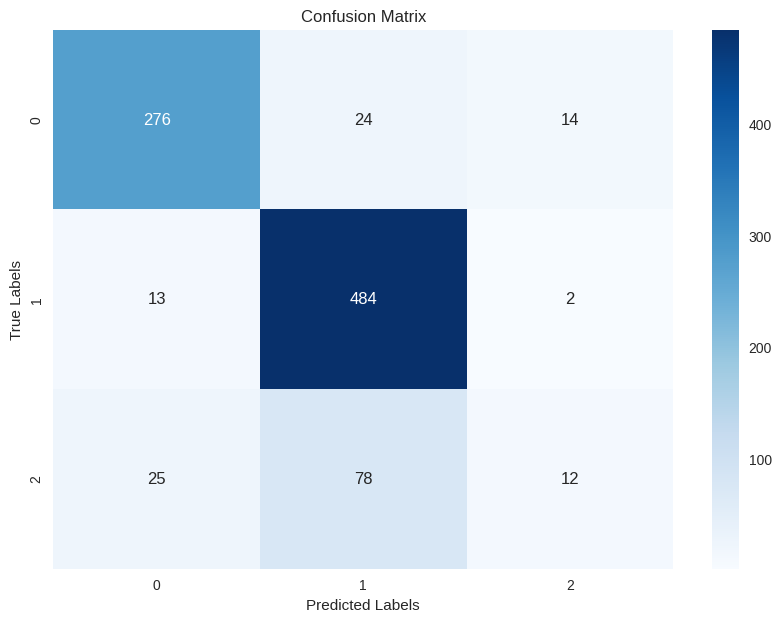

Accuracy: 0.8318965517241379
Kappa: 0.689973744737169
Classification Report:
                 precision    recall  f1-score   support

       ACIDENTE       0.88      0.88      0.88       314
      INCIDENTE       0.83      0.97      0.89       499
INCIDENTE GRAVE       0.43      0.10      0.17       115

       accuracy                           0.83       928
      macro avg       0.71      0.65      0.65       928
   weighted avg       0.79      0.83      0.80       928



In [52]:
true_labels = pred_conj_teste['ocorrencia_classificacao']
predicted_labels = pred_conj_teste['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)


Vamos tentar melhorar o modelo, né...

In [54]:
arvore_tunada = tune_model(modelo_arvore_decisao)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8167,0.8321,0.8167,0.7153,0.7625,0.6535,0.6735
1,0.8464,0.8408,0.8464,0.7434,0.7908,0.7075,0.7319
2,0.8410,0.8535,0.8410,0.7348,0.7839,0.6993,0.7229
3,0.8571,0.8746,0.8571,0.7508,0.8004,0.7315,0.7528
4,0.8491,0.8634,0.8491,0.7438,0.7929,0.7157,0.7371
5,0.8544,0.8558,0.8544,0.7497,0.7981,0.7243,0.7481
6,0.8544,0.8652,0.8544,0.7487,0.7980,0.7259,0.7476
7,0.8518,0.8649,0.8518,0.7462,0.7954,0.7205,0.7424
8,0.8189,0.8362,0.8189,0.7170,0.7644,0.6581,0.6783


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(arvore_tunada)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_samples_leaf=6,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1234, splitter='best')


In [55]:
evaluate_model(arvore_tunada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
pred_tunado = predict_model(arvore_tunada, data = dados_teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8341,0,0.8341,0.7310,0.7789,0.6903,0.7111


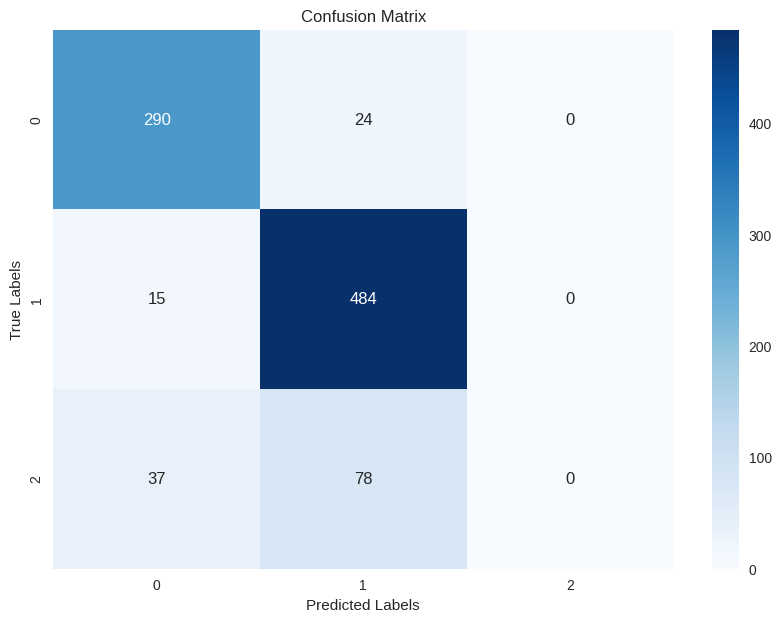

Accuracy: 0.834051724137931
Kappa: 0.6902523288728212
Classification Report:
                 precision    recall  f1-score   support

       ACIDENTE       0.85      0.92      0.88       314
      INCIDENTE       0.83      0.97      0.89       499
INCIDENTE GRAVE       0.00      0.00      0.00       115

       accuracy                           0.83       928
      macro avg       0.56      0.63      0.59       928
   weighted avg       0.73      0.83      0.78       928



In [57]:
true_labels = pred_tunado['ocorrencia_classificacao']
predicted_labels = pred_tunado['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

### Floresta aleatória

In [ ]:
dados_train, dados_test = train_test_split(dados, test_size=0.2, random_state=42)

In [ ]:
dados_train.shape

(3708, 12)

In [ ]:
dados_train.head()

,ocorrencia_classificacao,ocorrencia_tipo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_segmento_aviacao,aeronave_tipo_operacao,aeronave_nivel_dano
598,INCIDENTE,OUTROS,RAYTHEON AIRCRAFT,58,PISTÃO,2.0,2449,6.0,2005.0,PARTICULAR,VOO PRIVADO,NENHUM
1525,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AEROMOT,AMT-600,PISTÃO,1.0,900,2.0,2005.0,INSTRUÇÃO,VOO DE INSTRUÇÃO,NENHUM
4057,INCIDENTE GRAVE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,LET AIRCRAFT INDUSTRIES,L410UVP-E20,TURBOÉLICE,2.0,6600,21.0,2007.0,REGULAR,VOO REGULAR,NENHUM
2075,INCIDENTE GRAVE,COM TREM DE POUSO,CESSNA AIRCRAFT,150F,PISTÃO,1.0,726,2.0,1966.0,INSTRUÇÃO,VOO DE INSTRUÇÃO,SUBSTANCIAL
3376,INCIDENTE,OUTROS,AERO BOERO,AB-115,PISTÃO,1.0,770,3.0,1991.0,INSTRUÇÃO,VOO DE INSTRUÇÃO,LEVE


In [ ]:
# <> Iniciando  a configuração do modelo
# <> e informando a variável resposta
# <> session_id => para reprodutibilidade
clf = setup(data = dados_train, target = 'ocorrencia_classificacao', test_data = dados_test, session_id = 12345, index = False)

,Description,Value
0,Session id,12345
1,Target,ocorrencia_classificacao
2,Target type,Multiclass
3,Target mapping,"ACIDENTE: 0, INCIDENTE: 1, INCIDENTE GRAVE: 2"
4,Original data shape,"(4636, 12)"
5,Transformed data shape,"(4636, 35)"
6,Transformed train set shape,"(3708, 35)"
7,Transformed test set shape,"(928, 35)"
8,Numeric features,4
9,Categorical features,7


In [ ]:
# <> -----------------------------
# <> Criação do Modelo random forest
rf_fold_tree_model = create_model('rf', n_estimators = 100, max_depth = 10, min_samples_split = 2, fold = 20)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:33:43
Status,. . . . . . . . . . . . . . . . . .,Fitting 20 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(rf_fold_tree_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=12345, verbose=0,
                       warm_start=False)


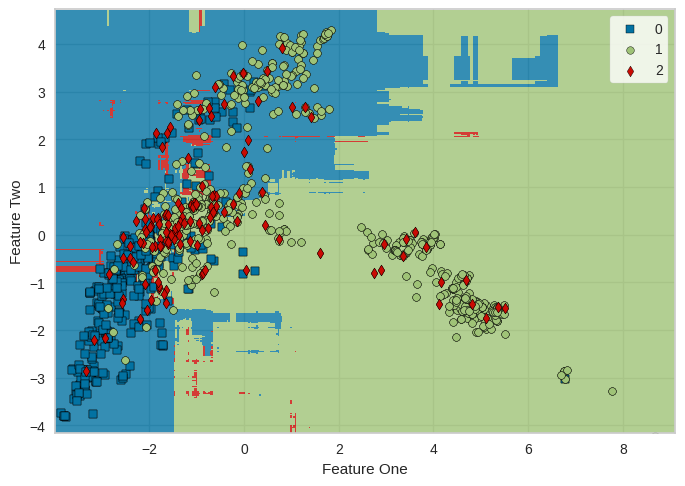

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'boundary')

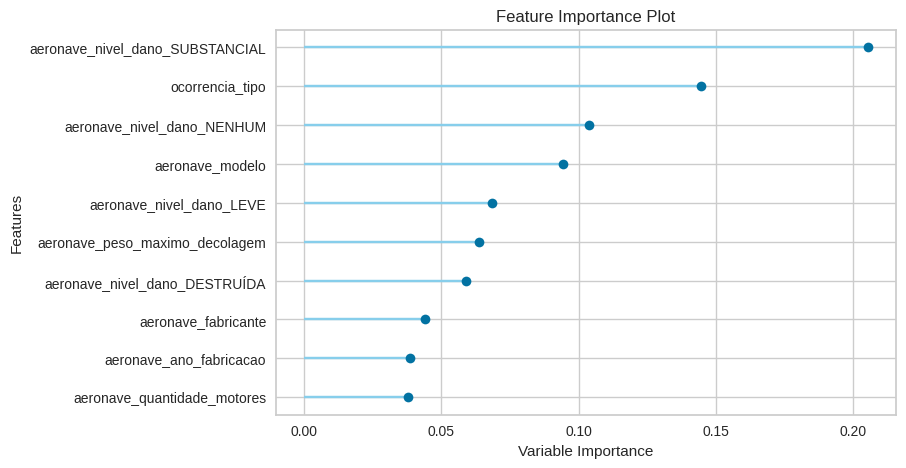

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'feature')

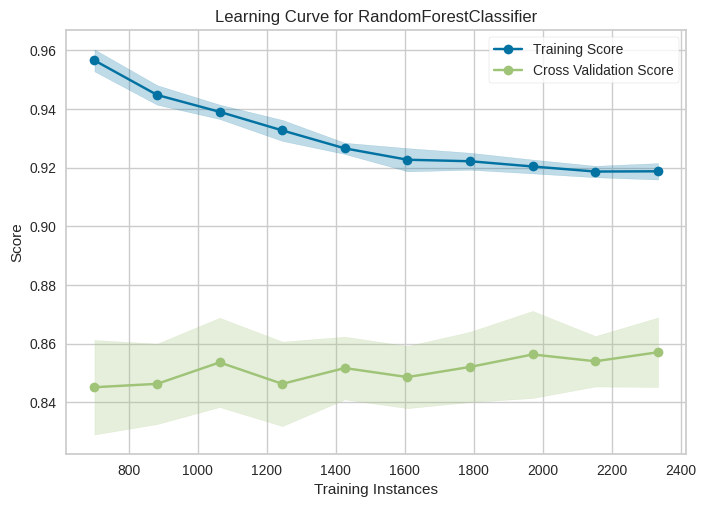

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'learning')

In [ ]:
# <> -----------------------------
# <> Otimizar o modelo
tuned_rf = tune_model(rf_fold_tree_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8385,0.9296,0.8385,0.7321,0.7817,0.6979,0.7182
1,0.8423,0.9393,0.8423,0.7355,0.7853,0.7051,0.7256
2,0.8500,0.9226,0.8500,0.7460,0.7940,0.7155,0.7391
3,0.8346,0.9165,0.8346,0.7319,0.7798,0.6888,0.7087
4,0.8462,0.9363,0.8462,0.7428,0.7909,0.7133,0.7321
5,0.8378,0.9152,0.8378,0.7345,0.7828,0.6959,0.7150
6,0.8533,0.9468,0.8533,0.7478,0.7970,0.7239,0.7446
7,0.8456,0.9311,0.8456,0.7417,0.7899,0.7075,0.7297
8,0.8494,0.9225,0.8494,0.7446,0.7935,0.7157,0.7371


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_samples_leaf=4,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=12345, verbose=0,
                       warm_start=False)


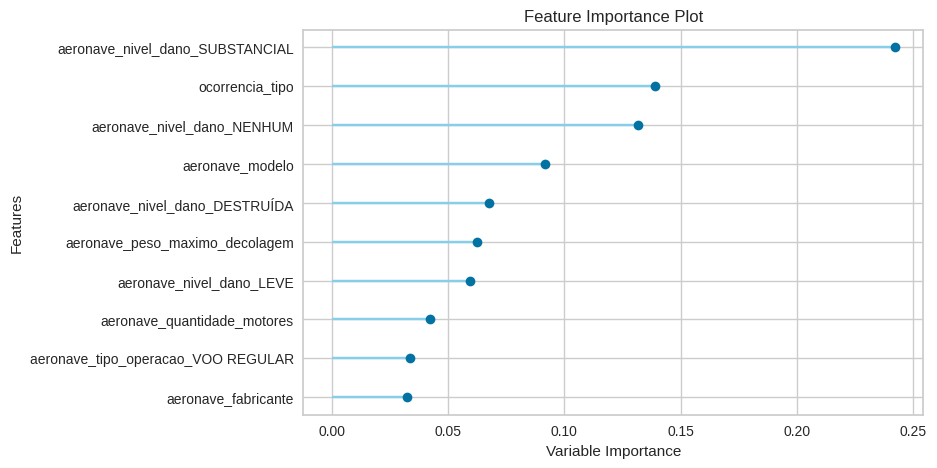

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(tuned_rf, plot = 'feature')

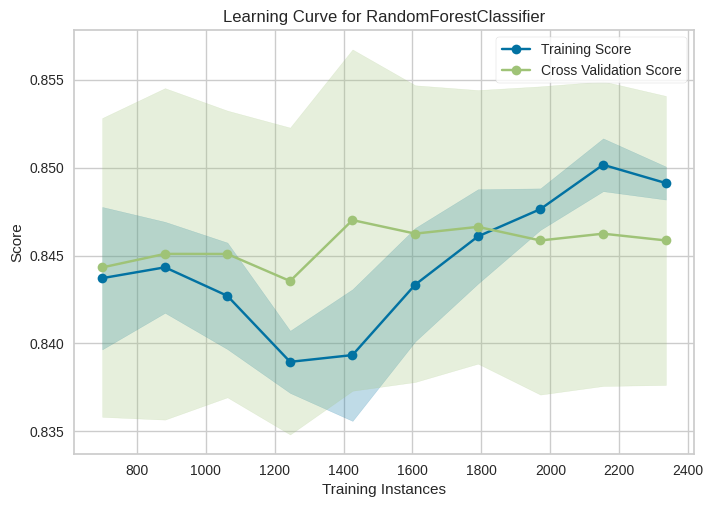

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(tuned_rf, plot = 'learning')

In [ ]:
# <> -----------------------------------
# Fazendo predição do modelo
rf_testing_pred = predict_model(tuned_rf, data = dados_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8319,0,0.8319,0.7288,0.7769,0.6870,0.7070


In [ ]:
# <> -----------------------------------
# <> Visualizando Cabeçalho do Data.Frame
rf_testing_pred.head()

,ocorrencia_tipo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_segmento_aviacao,aeronave_tipo_operacao,aeronave_nivel_dano,prediction_label,prediction_score
2814,PANE SECA,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,1.0,1202,4.0,1979.0,PARTICULAR,VOO PRIVADO,SUBSTANCIAL,ACIDENTE,0.8628
2830,POUSO BRUSCO,MITSUBISHI,MU-2B-36A,TURBOÉLICE,2.0,5250,11.0,1978.0,TÁXI AÉREO,TÁXI AÉREO,LEVE,INCIDENTE,0.6897
2630,OUTROS,EMBRAER,ERJ 170-200 LR,JATO,2.0,38790,92.0,2006.0,REGULAR,VOO REGULAR,LEVE,INCIDENTE,0.9130
553,PERDA DE CONTROLE NO SOLO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1497,1.0,1973.0,AGRÍCOLA,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,ACIDENTE,0.9221
3627,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AIRBUS INDUSTRIE,A320-214,JATO,2.0,77000,184.0,2007.0,REGULAR,VOO REGULAR,NENHUM,INCIDENTE,0.9389


In [59]:
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = rf_testing_pred['ocorrencia_classificacao']
predicted_labels = rf_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)


NameError: name 'rf_testing_pred' is not defined

## Nível de curiosidade


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8428,0.0000,0.8428,0.7383,0.7869,0.7032,0.7250,0.1730
lda,Linear Discriminant Analysis,0.8428,0.0000,0.8428,0.7682,0.7885,0.7036,0.7247,0.1730
lr,Logistic Regression,0.8411,0.0000,0.8411,0.8068,0.7943,0.7026,0.7202,2.1230
gbc,Gradient Boosting Classifier,0.8358,0.0000,0.8358,0.8114,0.8167,0.7029,0.7087,1.7880
ada,Ada Boost Classifier,0.8328,0.0000,0.8328,0.8015,0.8099,0.6951,0.7023,0.3560
lightgbm,Light Gradient Boosting Machine,0.8314,0.9378,0.8314,0.8136,0.8191,0.6988,0.7019,0.7410
xgboost,Extreme Gradient Boosting,0.8274,0.9362,0.8274,0.8114,0.8170,0.6929,0.6951,0.6210
rf,Random Forest Classifier,0.8239,0.9279,0.8239,0.8005,0.8081,0.6831,0.6871,0.7080
et,Extra Trees Classifier,0.8174,0.9093,0.8174,0.7937,0.8028,0.6728,0.6758,0.5670
dt,Decision Tree Classifier,0.7883,0.8344,0.7883,0.7835,0.7853,0.6297,0.6303,0.1760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]